# 傅立叶变换

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [28]:
src1 = cv2.imread('../datas/f2.jpg')
rgb1 = cv2.cvtColor(src1,cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
rgb_f1 = rgb1.astype(np.float32)

In [29]:
f = np.fft.fft2(gray1)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

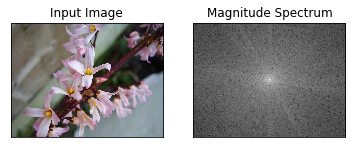

In [30]:
plt.subplot(121)
plt.imshow(rgb1,cmap = 'gray')
plt.title('Input Image')
plt.xticks([]),plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum,cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.xticks([]),plt.yticks([])

In [32]:
rows,cols = gray1.shape
crow,ccol = rows//2,cols//2
fshift[crow-30:crow+30,ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

(Text(0.5,1,'Result in JET'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

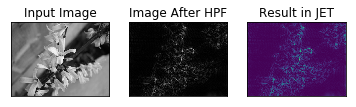

In [34]:
plt.subplot(131),plt.imshow(gray1,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(img_back,cmap = 'gray')
plt.title('Image After HPF'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'),plt.xticks([]),plt.yticks([])

In [37]:
dft = cv2.dft(np.float32(gray1),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows,cols = gray1.shape
crow,ccol = rows//2,cols//2
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

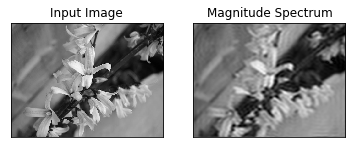

In [38]:
plt.subplot(121),plt.imshow(gray1,cmap = 'gray')
plt.title('Input Image'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap = 'gray')
plt.title('Magnitude Spectrum'),plt.xticks([]),plt.yticks([])

## 拉普拉斯算子

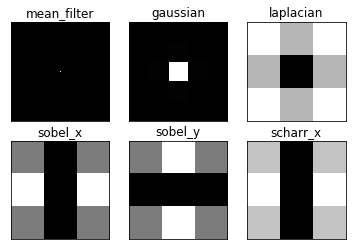

In [41]:
mean_filter = np.ones((256,256))
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

scharr = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])

filters = [mean_filter,gaussian,laplacian,sobel_x,sobel_y,scharr]
filter_name = ['mean_filter','gaussian','laplacian','sobel_x','sobel_y','scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]),plt.xticks([]),plt.yticks([])

(Text(0.5,1,'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

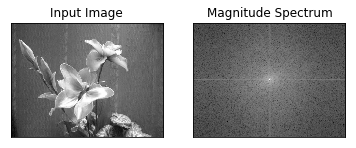

In [43]:
img = cv2.imread('../datas/f4.jpg',0)
f = np.fft.fft2(img)  #傅里叶变换得到频谱，一般来说，低频分量模值最大
fshift = np.fft.fftshift(f)#平移频谱到图像中央
# 将频谱转换成db
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(321),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


rows, cols = img.shape
crow,ccol = rows//2 , cols//2
#设计一个高通滤波器对应0, 低频对应1
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
#平移逆变换
f_ishift = np.fft.ifftshift(fshift)
#傅里叶反变换
img_back = np.fft.ifft2(f_ishift)
# 取绝对值
img_back = np.abs(img_back)
plt.subplot(323),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

# fft in cv2
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])